In [66]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for NN 
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

from sklearn.metrics import r2_score

In [4]:
Graduate_Admission_datasets = pd.read_csv('Admission_Predict.csv')
Graduate_Admission_datasets.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
97,98,331,120,3,4.0,4.0,8.96,1,0.86
279,280,304,102,2,3.0,4.0,8.73,0,0.67
232,233,312,107,2,2.5,3.5,8.27,0,0.69
47,48,339,119,5,4.5,4.0,9.70,0,0.89
322,323,314,107,2,2.5,4.0,8.27,0,0.72


In [5]:
Graduate_Admission_datasets.shape

(400, 9)

In [6]:
Graduate_Admission_datasets.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
Graduate_Admission_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [10]:
Graduate_Admission_datasets.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
Graduate_Admission_datasets.duplicated().sum()

0

In [20]:
Graduate_Admission_datasets.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [21]:
Graduate_Admission_datasets.describe().corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,0.489117,0.613319,0.528098,0.527931,0.527682,0.529210,0.522257,0.521412
GRE Score,0.489117,1.000000,0.656482,0.391556,0.392338,0.392760,0.405244,0.386795,0.387719
TOEFL Score,0.613319,0.656482,1.000000,0.950875,0.951132,0.951268,0.955287,0.949138,0.949422
University Rating,0.528098,0.391556,0.950875,1.000000,0.999998,0.999996,0.999879,0.999971,0.999968
SOP,0.527931,0.392338,0.951132,0.999998,1.000000,0.999999,0.999894,0.999969,0.999967
LOR,0.527682,0.392760,0.951268,0.999996,0.999999,1.000000,0.999901,0.999965,0.999967
CGPA,0.529210,0.405244,0.955287,0.999879,0.999894,0.999901,1.000000,0.999796,0.999814
Research,0.522257,0.386795,0.949138,0.999971,0.999969,0.999965,0.999796,1.000000,0.999997
Chance of Admit,0.521412,0.387719,0.949422,0.999968,0.999967,0.999967,0.999814,0.999997,1.000000


In [22]:
Graduate_Admission_datasets = Graduate_Admission_datasets.drop(columns = ['Serial No.'],axis = 1)
Graduate_Admission_datasets.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
278,308,103,2,3.0,3.5,8.49,0,0.66
128,326,112,3,3.5,3.0,9.10,1,0.84
220,313,103,3,4.0,4.0,8.75,0,0.76
57,298,99,2,4.0,2.0,7.60,0,0.46
383,300,100,3,3.0,3.5,8.26,0,0.62


In [24]:
x = Graduate_Admission_datasets.iloc[:,0:-1]
y = Graduate_Admission_datasets.iloc[:,-1]

In [25]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [26]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [33]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1


In [35]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1


In [36]:
y_train

93     0.44
23     0.95
299    0.71
13     0.62
90     0.64
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 320, dtype: float64

In [37]:
y_test

398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
       ... 
347    0.42
41     0.49
180    0.71
132    0.71
224    0.67
Name: Chance of Admit , Length: 80, dtype: float64

In [42]:
# now we dowing the minmax sclliang 
scaler = MinMaxScaler()

x_train_scaler  = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [47]:
x_train_scaler

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [48]:
x_test_scaler

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

<br>
here now creating the neural networks 

In [70]:
model = Sequential ()

model.add(Dense(7,activation = 'relu',input_dim = 7)) # input layer
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))  # output layer

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss = 'mean_squared_error',optimizer ='Adam')

<br>
here our NN is trained in the given below

In [73]:
history = model.fit(x_train_scaler,y_train,epochs =100,validation_split =0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.2697 - val_loss: 1.2363
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0505 - val_loss: 1.0243
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8647 - val_loss: 0.8313
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6834 - val_loss: 0.6577
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5267 - val_loss: 0.5056
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4133 - val_loss: 0.3779
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3094 - val_loss: 0.2756
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2184 - val_loss: 0.1951
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1521 - val_loss: 0.1338
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1103 - val_loss: 0.0890
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0690 - val_loss: 0.0576
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - val_loss: 0.0361


In [74]:
y_pred = model.predict(x_test_scaler)
y_pred 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.6804029 ],
       [0.6612832 ],
       [0.81427705],
       [0.7846372 ],
       [0.7964812 ],
       [0.6497401 ],
       [0.6698232 ],
       [0.5159216 ],
       [0.51648474],
       [0.9046683 ],
       [0.80756706],
       [0.9312987 ],
       [0.92616165],
       [0.66904956],
       [0.7186776 ],
       [0.698167  ],
       [0.7972086 ],
       [0.9352455 ],
       [0.588954  ],
       [0.64780825],
       [0.62753826],
       [0.7949465 ],
       [0.8341832 ],
       [0.87946177],
       [0.71584773],
       [0.60266703],
       [0.6859377 ],
       [0.70761573],
       [0.90084404],
       [0.65829694],
       [0.93024516],
       [0.59216285],
       [0.82964474],
       [0.7728141 ],
       [0.69187367],
       [0.64957935],
       [0.5324301 ],
       [0.6960411 ],
       [0.90030557],
       [0.71150184],
       [0.8426573 ],
       [0.6371757 ],
       [0.88771135],
       [0.65222675],
       [0.952886  ],
       [0.76450956],
       [0.71641624],
       [0.820

In [75]:
# here now finding the accuracy 
r2_score(y_test,y_pred)

0.7548159754535335

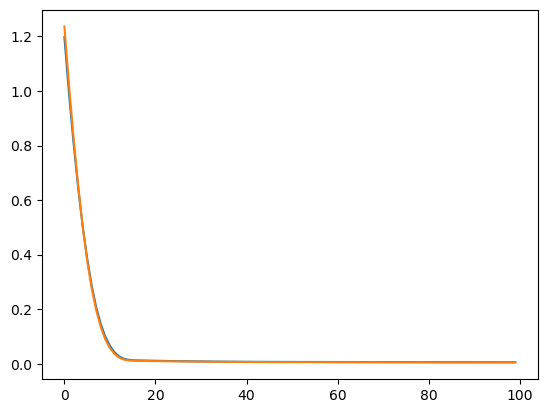

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])